# Descriptive Statistics
Menggunakan statistik untuk merangkum dan mendeskripsikan sebuah data

## Terminologi
- dataset: sekumpulan data
- population: seluruh data yang bersangkutan dengan yang kita cari. contohnya jika kita cari tinggi badan orang Semarang, maka populasi adalah serluruh orang Semarang - termasuk pria, wanita, bayi, ortu, yang lagi tinggail diluar, yang lagi di Indonesia, 
- sample: sebagian dari population. Diusahakan sample nya tidak berat ke suatu sub-population tertentu (misalnya di Semarang tadi hanya mengumpulkan data orang pria yang di kampus A)
- outlier: data yang beda nya jauh dari "tengah" data kita

# Central Tendency
"Tengah" datanya ada dimana
- mean
- median
- mode

# Spread
Seberapa tersebar dari tengah datanya
- variance
- standard deviation. namanya sample pasti lebih tidak akurat daripada population, jadi pembaginya kita kurangi 1. population pembaginya tidak dikurangi.
- range. perbedaan nilai max dan min
- percentile. titik % ke berapa di data kita, misalkan top 10% berarti percentil ke 90. misalkan data di tengah seluruh data berarti percentile ke 50, Quartile 2, median.
- quartile. percentile yang punya nama2 spesial:
    - percentile ke-25, Quartile ke-1
    - percentile ke-50, Quartile ke-2, Median
    - percentile ke-75, Quartile ke-3
- inter-quartile range (nilai Q3 - Q1)
    - note: semua data yang ada di atas Q3 + 1.5IQR adalah outlier. data yang ada di bawah Q1 - 1.5IQR juga outlier.
- skewness
- kurtosis

# Correlation
Apakah ada hubungannya satu set data dengan set data lainnya   
contoh: apakah ada hubunganya tinggi dan berat badan data orang Semarang?
- iya, ada hubungan, hubungannya seperti apa?
    - positif, semakin tinggi semakin berat orangnya
    - negatif, semakin tinggi, semakin enteng orangnya
- tidak

Angka correlation coefficient r menunjukkan jawaban dari pertanyaan tersebut:
- saat r > 0, positif
- saat r = 0, tidak ada hubungan
- saat r < 0, negatif

r ada di antara -1 dan 1 nilainya. jadi r = -1 itu korelasi negatif yang maksimal. r = 1 korelasi positif yang maksimal.


In [110]:
# cara hitungnya di python

# import package
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

# untuk visualisasi
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])

In [2]:
# membuat dummy data
x = [8.0, 1, 2.5, 4, 28.0]
x_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]

# versi numpy
y = np.array(x)
y_nan = np.array(x_nan)

# versi Pandas Series
z = pd.Series(x)
z_nan = pd.Series(x_nan)

print(type(x), type(y), type(z))

<class 'list'> <class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


# Central Tendency
1. Mean
2. Median
3. Mode

## Mean

In [3]:
# hitung satu satu, jangan lakukan ini
(8 + 1 + 2.5 + 4 +28) / 5

8.7

In [4]:
# menggunakan python basic
sum(x) / len(x)

8.7

In [11]:
# pakai numpy
print(y.mean())
print(np.mean(y))

8.7
8.7


In [6]:
# pakai pandas
z.mean()

8.7

In [14]:
# pakai package statistics
statistics.mean(x)

8.7

In [18]:
# bagaimana kalau datanya ada yang missing value, NaN?
print("Untuk data yang ada missing value nya")
# menggunakan python basic
print(sum(x_nan) / len(x_nan))

# pakai numpy
print(y_nan.mean())
print("numpy pakai nanmean bisa", np.nanmean(y_nan))

# pakai pandas
print("pandas bisa", z_nan.mean())

# pakai statistics
print(statistics.mean(x_nan))

Untuk data yang ada missing value nya
nan
nan
numpy pakai nanmean bisa 8.7
pandas bisa 8.7
nan


## Weighted Mean
bagaimana saat data kita bobot nya beda beda? cari weighted mean menggunakan apa?
- numpy.average

In [24]:
print(y)
bobot = np.array([0.1, 0.1, 0.1, 0.1, 0.6])
print(bobot)

[ 8.   1.   2.5  4.  28. ]
[0.1 0.1 0.1 0.1 0.6]


In [25]:
# gunakan numpy average, berikan bobot dengan opsi weights
np.average(y, weights=bobot)

18.35

## Harmonic Mean
saat data kita ada outlier, kita bisa pakai teknik ini untuk mendapatkan rata-rata yang lebih mendekati data aslinya

misalnya di sebuah perusahaan ada 4 karyawan. ada CEO dengan gaji 100jt, ada 3 karyawan lain dengan gaji 3,4,5 juta. berapa rata2 gaji di perusahaan ini?

In [26]:
gaji = np.array([3,4,5,100])

print(gaji.mean())

28.0


In [27]:
# gunakan statistics untuk cari harmonic mean
statistics.harmonic_mean(gaji)

5.042016806722689

In [28]:
# scipy stats juga punya fungsi harmonic mean
scipy.stats.hmean(gaji)

5.04201680672269

# Geometric Mean
bagaimana kalau kita mau cari rata2 dari data yang unit nya berbeda.   
misalkan kita mau beli Camera, ada dua seller yang kita pertimbangkan.   
- seller A dengan 1011 reviews, dan rating 4.5/5 
- seller B dengan 2002 reviews, dan rating 4.2/5

In [29]:
sellerA = [1011,4.5/5]
sellerB = [2002,4.2/5]

# pakai scipy stats untuk cari geometric mean nya
print("seller A gmean:", scipy.stats.gmean(sellerA))
print("seller B gmean:", scipy.stats.gmean(sellerB))

seller A gmean: 30.164548728598618
seller B gmean: 41.00829184445507


# Median
mencari titik tengah ke 50% sebuah value yang nilainya lebih tinggi dari 50% data lainnya di dataset tersebut

In [39]:
print(np.sort(x))

# pakai statistics
print("statistics")
print(statistics.median_low(x))
print(statistics.median(x))
print(statistics.median_high(x))

# pakai numpy
print("numpy")
print(np.median(y))

# pakai pandas
print("pandas")
print(z.median())

[ 1.   2.5  4.   8.  28. ]
statistics
4
4
4
numpy
4.0
pandas
4.0


In [40]:
x2 = [1,2,3,4,5,6]
y2 = np.array(x2)
z2 = pd.Series(x2)
print(x2)

# pakai statistics
print("statistics")
print(statistics.median_low(x2))
print(statistics.median(x2))
print(statistics.median_high(x2))

# pakai numpy
print("numpy")
print(np.median(y2))

# pakai pandas
print("pandas")
print(z2.median())

[1, 2, 3, 4, 5, 6]
statistics
3
3.5
4
numpy
3.5
pandas
3.5


# Mode
mencari data yang paling sering muncul

In [41]:
# buat dummy data
u = [2, 3, 2, 8, 12]
v = [12, 15, 12, 15, 21, 15, 12]

print(np.sort(u))
print(np.sort(v))

[ 2  2  3  8 12]
[12 12 12 15 15 15 21]


In [47]:
# statistics
print(statistics.mode(u))
print(statistics.mode(v))

# scipy stats
print(scipy.stats.mode(u))
print(scipy.stats.mode(v))

# pandas
us = pd.Series(u)
vs = pd.Series(v)
print(us.mode())
print(vs.mode())

2
12
ModeResult(mode=array([2]), count=array([2]))
ModeResult(mode=array([12]), count=array([3]))
0    2
dtype: int64
0    12
1    15
dtype: int64


In [46]:
# dari scipy stats mau ambil mode saja, atau count saja
hasil = scipy.stats.mode(u)

print("mode", hasil.mode[0])
print("angka mode muncul berapa kali", hasil.count[0])

mode 2
angka mode muncul berapa kali 2


### latihan: diberikan data berikut, cari mean, median, dan mode nya
`data = [50,70,80,-15,3.5,7]`

In [49]:
data = [50,70,80,-15,3.5,7]

# pakai statistics dan scipy stats
print(statistics.mean(data))
print(statistics.median(data))
print(scipy.stats.mode(data).mode[0])

32.583333333333336
28.5
-15.0


# Measure of Spread / Variability
- variance
- standard deviation
- range
- percentile dan quartile
- inter-quartile range
- skewness
- kurtosis

In [50]:
# siapin data
print(x)

[8.0, 1, 2.5, 4, 28.0]


## Variance

In [56]:
# pakai statistics, sudah berasumsi ini adalah data sample
statistics.variance(x)

123.2

In [57]:
# pakai numpy
# jangan lupa bilang ke dia kalau ini tipe data sample
print(np.var(x, ddof=1))

print(y.var(ddof=1))

123.19999999999999
123.19999999999999


In [58]:
# pakai pandas, sudah berasumsi ini adalah data sample
z.var()

123.19999999999999

In [60]:
# bagaimana kalau data kita adalah population?
# statistics pakai pvariance
print(statistics.pvariance(x))

# numpy pakai ddof=0, atau default nya aja
print(np.var(x))

# pandas kita berikan opsi ddof=0
print(z.var(ddof=0))

98.56
98.55999999999999
98.55999999999999


## Standard Deviation

In [62]:
# kita bisa ambil hasil variance kemudian kita akar
np.sqrt(123.19999999999999)

11.099549540409285

In [63]:
# kita bisa minta langsung dengan bantuan dari
# untuk sample
# statistics
print(statistics.stdev(x))

# numpy
print(np.std(x, ddof=1))

# pandas
print(z.std())

11.099549540409287
11.099549540409285
11.099549540409285


In [64]:
# untuk population
print(np.sqrt(98.56))

# statistics
print(statistics.pstdev(x))

# numpy
print(np.std(x, ddof=0))

# pandas
print(z.std(ddof=0))

9.927738916792686
9.927738916792686
9.927738916792684
9.927738916792684


## Range
perbedaan value max dan min di sebuah dataset

In [65]:
max(x) - min(x)

27.0

In [66]:
# pakai bantuan numpy
np.ptp(x)

27.0

In [72]:
# pakai pandas, hanya bisa cari max dan min, kita kurangi sendiri untuk dapat range nya
z.max() - z.min()

27.0

## Percentile and Quartile
misalnya kita mau cari data percentile ke 10 (10% harga rumah2 termurah di Jakarta dari data rumah Jakarta)

kalau di percentile ke 25, maka itu adalah titik harga dimana 25% rumah jakarta dibawah harga tersebut.

untuk percentile ke 25, 50, dan 75 punya nama lain: quartile 1,2,3. Quartile 2 juga disebut median.

In [73]:
# siapin data
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
y = np.array(x)
z = pd.Series(x)

print(y)

[-5.  -1.1  0.1  2.   8.  12.8 21.  25.8 41. ]


In [74]:
# statistics quantiles
statistics.quantiles(x, n=2)

[8.0]

In [79]:
# jika menggunakan method quantiles dari package statistics,
# jangan lupa untuk menambahkan opsi method='inclusive'
# jika tidak, dia berasumsi angka yang udah diambil tidak termasuk perhitungan pembagian berikutnya
# kiri = [-5.,  -1.1,  0.1,  2.]
# kanan = [12.8, 21.,  25.8, 41. ]

# statistics.quantiles(x, n=4)

In [78]:
# untuk mencari angka Quartile 1,2,3 dari data kita, gunakan opsi method='inclusive'
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
statistics.quantiles(x, n=4, method='inclusive')

[0.1, 8.0, 21.0]

In [80]:
# bisa juga pakai numpy
np.percentile(x, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [87]:
# seperti fungsi percentile tapi tulisnya dalam bentuk persein, 25% = 0.25
np.quantile(x, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [85]:
# pandas punya fungsi quantile
z.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

## Inter-Quartile Range
angka Q3 - angka Q1

In [90]:
# pakai numpy
q1, q3 = np.quantile(x, [0.25, 0.75])

q3 - q1

20.9

In [91]:
# pakai pandas
q1, q3 = z.quantile([0.25, 0.75])

q3 - q1

20.9

## Skewness

In [92]:
# pakai scipy stats
scipy.stats.skew(x, bias=False)

0.9249043136685094

In [93]:
# pakai pandas
z.skew()

0.9249043136685096

## Kurtosis

In [94]:
# pakai scipy stats
scipy.stats.kurtosis(x, bias=False)

0.14770623629658886

In [95]:
# pakai pandas
z.kurtosis()

0.14770623629658886

# Summary
Mau melihat Stats sebuah data sekaligus

In [99]:
# pakai scipy stats
hasil = scipy.stats.describe(x, ddof=1, bias=False)
hasil

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

In [100]:
hasil.mean

11.622222222222222

In [102]:
# pandas jg punya describe
hasil = z.describe()
hasil

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

In [103]:
hasil['50%']

8.0

### latihan: diberikan data berikut, cari dia punya std deviation, range, dan inter-quartile-range
`x = [30, 35, 60, 70, 90, 100]`

In [106]:
x = [30, 35, 60, 70, 90, 100]

# pakai pandas
xs = pd.Series(x)
print(xs.std()) # sample

# pakai numpy array
print(np.ptp(x))

# cari Q1 dan Q3 kemudian hitung Q3-Q1
# pakai pandas
q1, q3 = xs.quantile([0.25,0.75])
print(q3-q1)

28.35783254528926
70
43.75


In [107]:
hasil = xs.describe()
hasil

count      6.000000
mean      64.166667
std       28.357833
min       30.000000
25%       41.250000
50%       65.000000
75%       85.000000
max      100.000000
dtype: float64

In [108]:
print(hasil['std'])
print(hasil['max'] - hasil['min'])
print(hasil['75%'] - hasil['25%'])

28.35783254528926
70.0
43.75


# Measure of Correlation
mencari hubungan antara dua set data.

angka correlation coefficient r menunjukkan kekuatan dan sifat korelasi tersebut. jika negative, maka korelasi negative, begitu pula sebaliknya. jika 0 maka tidak ada korelasi. r ada di atnara -1 dan 1.

- covariance
- correlation coefficient

mirip seperti hubugan variance dengan standard deviation

In [109]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]

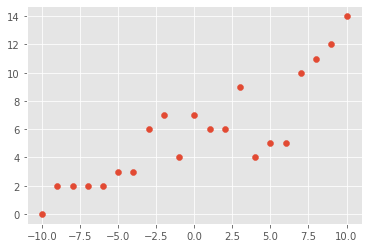

In [111]:
# kita bisa buat scatter plot untuk melihat korelasi antara x dan y
plt.scatter(x, y)

## Correlation Coefficient

In [113]:
# pakai scipy stats
r, p = scipy.stats.pearsonr(x, y)
print(r)

0.8619500056316058


In [115]:
# pakai numpy
np.corrcoef(x, y)[0,1]

0.8619500056316061

In [116]:
# pakai pandas
series_x = pd.Series(x)
series_y = pd.Series(y)

series_x.corr(series_y)

0.8619500056316061

## Linear Regression

In [118]:
# untuk mencari angka2 yang diperlukan untuk membuat garis linear regression
# bisa pakai bantuan scipy stats
hasil = scipy.stats.linregress(x, y)
hasil

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)

formula garis linear regression adalah `y = intercept + slope * x`

correlation coefficient nya adalah rvalue

In [120]:
print("untuk ambil correlation coefficient saja")
hasil.rvalue

untuk ambil correlation coefficient saja


0.861950005631606

[ 0.53246753  1.05064935  1.56883117  2.08701299  2.60519481  3.12337662
  3.64155844  4.15974026  4.67792208  5.1961039   5.71428571  6.23246753
  6.75064935  7.26883117  7.78701299  8.30519481  8.82337662  9.34155844
  9.85974026 10.37792208 10.8961039 ]


Text(0.5, 1.0, 'linear regression')

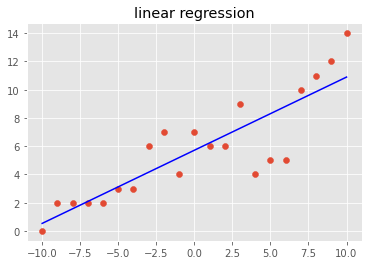

In [127]:
# untuk mencari garis linear regression, kt bisa pakai formula linear regression nya
y_lr = hasil.intercept + hasil.slope * np.array(x)

print(y_lr)

# garis linear regression nya
plt.plot(x,y_lr, color="blue")

# data asli
plt.scatter(x, y)

plt.title("linear regression")